Model for vehicle velocity control.

http://apmonitor.com/pdc/index.php/Main/SpeedControl

Comparision of a step input and a more complicated input. 

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

$m \frac{dv(t)}{dt} = F_p u(t) - \frac{1}{2} \rho A C_d v(t)^2$

$\frac{dv(t)}{dt} = \frac{1}{m} [ F_p u(t) - \frac{1}{2} \rho A C_d v(t)^2 ]$

In [3]:
# Mass (car + load), kg
m = 700

# Thrust parameter, (N / %pedal)
F_p = 30

# Air density, kg/m^3
rho = 1.225 

# vehicle cross-sectional area (m^2)
A = 5

# Drag coefficient
C_d = 0.24

def vehicle_model(v, t, u_func):
    
    u = u_func(t)
    
    drive = F_p * u
    drag = 0.5 * rho * A * C_d * (v**2)
    
    return (1. / m) * (drive - drag)
    

In [4]:
step_t = 5
step_val = 50

def step_input(t):
    return 0 if t < step_t else step_val

In [5]:
t = np.linspace(0, 200, 100)

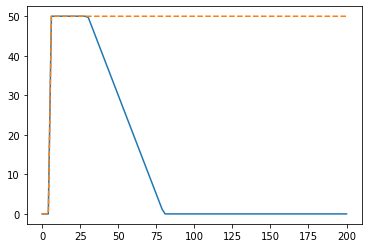

In [6]:
def complicated_input(t):
    
    if t < 5:
        return 0
    
    if t < 30:
        return 50
    
    if t < 80:
        return 80 - t
    
    return 0


plt.plot(t, [complicated_input(t_val) for t_val in t])
plt.plot(t, [step_input(t_val) for t_val in t], '--')
plt.show()

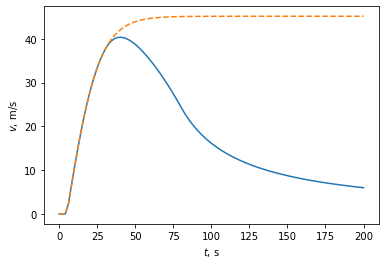

In [7]:
y_sim_step = odeint(vehicle_model, 0, t, args=(step_input,))
y_sim_comp = odeint(vehicle_model, 0, t, args=(complicated_input,))

plt.plot(t, y_sim_comp)
plt.plot(t, y_sim_step, '--')

plt.xlabel('$t$, s')
plt.ylabel('$v$, m/s')
plt.show()